In [8]:
import pandas as pd
import numpy as np

In [9]:
df = pd.read_csv("C:\\Users\\anika\\Downloads\\fct_invoice.csv")

In [10]:
ds = pd.read_json('C:\\Users\\anika\\Downloads\\dim_customer.json')

In [12]:
#EASY

In [13]:
# How many unique customers are in the dataset?

In [14]:
df['customer_id'].nunique()

5191

In [15]:
# What are the different categories of products available?

In [16]:
df['category'].unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [17]:
#  How many unique categories are there?

In [18]:
df['category'].nunique()

8

In [19]:
# Which payment method is the most popular? How many times was it used?

In [20]:
df.groupby('payment_method').size().sort_values(ascending=False).head(1)

payment_method
Cash    44447
dtype: int64

In [21]:
# Medium

In [22]:
# What are the three most popular categories, by total sales?

In [47]:
df['total_sales'] = df['quantity']*df['price']

totalsalescalc = df.groupby('category')['total_sales'].sum()
totalsales = totalsalescalc.sort_values(ascending=False).head(3)

totalsales

category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64

In [26]:
# What are the total sales attributed to customers over the age of 45?

In [57]:
#same id
customerID = ds.query('age > 45')['id']

new_df = df[df['customer_id'].isin(customerID)]
new_df['total_sales'] = new_df['quantity']*new_df['price']

forty_fivecalc = new_df['total_sales'].sum()

forty_fivecalc

C:\Users\anika\AppData\Local\Temp\ipykernel_22484\2050539977.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['total_sales'] = new_df['quantity']*new_df['price']


82039768.15

In [29]:
# How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

In [30]:
import matplotlib.pyplot as plt

In [31]:
dfcopy = df.copy()

In [32]:
dfcopy['invoice_date'] = pd.to_datetime(dfcopy['invoice_date'], format='%d/%m/%Y')
month = dfcopy['invoice_date'].dt.month

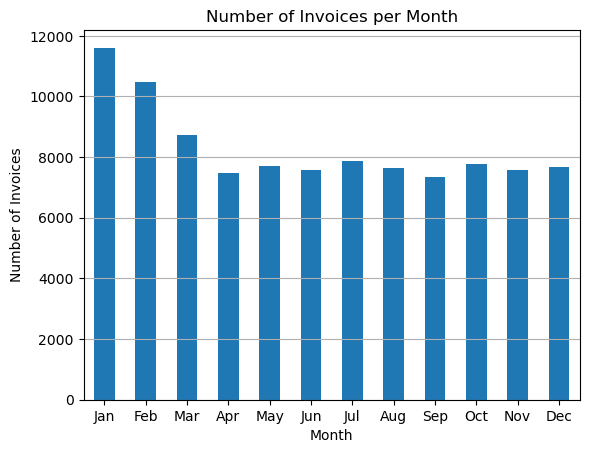

In [62]:
dfcopy.groupby(month).size().plot(kind='bar')
plt.title('Number of Invoices per Month')
plt.xlabel('Month')
plt.ylabel('Number of Invoices')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.grid(axis='y')
plt.show()

In [ ]:
As the year progresses, transactions decrease until April where the amount of transactions remain stagnant and do not fluctuate in large amounts. 

In [ ]:
# Hard
# Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [155]:
dscopy = ds.copy()

newdf = dscopy.merge(dfcopy,left_on='id', right_on='customer_id')


In [156]:
newdf["age"].fillna(0, inplace=True)
newdf["decade"] = (newdf['age']//10*10).astype(int)
newdf["decade"] = newdf["decade"].astype(str) + "-" + (newdf["decade"]+9).astype(str)


In [160]:
newdf["total_sales"] = newdf["quantity"]*newdf["price"]
newdf.pivot_table(index=['category'],columns = ['decade'],values=["total_sales"],aggfunc='sum')
newdf.pivot_table(index=['category'],values="total_sales",aggfunc='sum')

,total_sales
category,
Books,8.345529e+05
Clothing,1.139968e+08
Cosmetics,6.792863e+06
Food & Beverage,8.495351e+05
Shoes,6.655345e+07
Souvenir,6.358247e+05
Technology,5.786235e+07
Toys,3.980426e+06


In [161]:
newdf.pivot_table(index=['category'],columns = ['decade'],values=["total_sales"],aggfunc='sum')

total_sales                                        \
decade                   0-9       10-19        20-29        30-39   
category                                                             
Books              334012.05    12801.75     79461.75     84143.10   
Clothing         46003764.40  1927413.84  10250732.80  11354126.96   
Cosmetics         2777362.62   109619.36    605915.32    723544.70   
Food & Beverage    345875.59    13582.31     73491.96     87246.86   
Shoes            26468097.17   993281.35   5924878.24   7200839.66   
Souvenir           265661.04    12375.15     54943.32     64092.72   
Technology       23865450.00  1129800.00   5261550.00   6159300.00   
Toys              1587210.24    60426.24    385100.80    420582.40   

                                                                                
decade                 40-49        50-59        60-69       70-79       80-89  
category                                                                        
Books               87203.40     74962.20     80476.80    54827.85    26664.00  
Clothing         11215189.92  10321851.76  10660642.08  7769371.28  4493698.00  
Cosmetics          665034.96    587780.96    649990.76   419082.62   254531.60  
Food & Beverage     89553.29     72425.04     80976.09    55050.98    31332.93  
Shoes             7025590.02   5852857.84   5978893.54  4480269.05  2628744.60  
Souvenir            66391.80     54943.32     55025.43    38673.81    23718.06  
Technology        5954550.00   4435200.00   5471550.00  3638250.00  1946700.00  
Toys               390906.88    345067.52    363955.20   273244.16   153932.80